In [1]:
import csv

def parse_txt(filename, oriented=True):
    """
    Parse data from txt file into dict python type.
    JSON serializable.
    """
    data = {}
    with open(filename) as file:
        
        line = file.readline()
        while line:
            
            # skip comments
            if line[0] == '#':
                line = file.readline()
                continue
            
            parent, child = line.split()
            
            parent = int(parent)
            child = int(child)
            
            # rows in data file can be duplicated
            if parent in data:
                if child not in data[parent]['linked']:
                    data[parent]['linked'].append(child)
                    data[parent]['degree'] += 1
            else:
                data[parent] = { 
                    'linked': [child],
                    'degree': 1,
                }
                
            if oriented:
                if child not in data:
                    data[child] = { 
                    'linked': [],
                    'degree': 0,
                }
                
            else:
                if child in data:
                    if parent not in data[child]['linked']:
                        data[child]['linked'].append(parent)
                        data[child]['degree'] += 1

                else:    
                    data[child] = {
                        'linked': [parent],
                        'degree': 1,
                    }

            line = file.readline()

    return data

def parse_csv(filename, oriented=True):
    data = {}
    
    with open(filename) as file:
        reader = csv.reader(file)
        next(reader)
        
        for row in reader:
            
            parent = int(row[0])
            child = int(row[1])
            
            if parent in data:
                if child not in data[parent]['linked']:
                    data[parent]['linked'].append(child)
                    data[parent]['degree'] += 1
            else:
                data[parent] = { 
                    'linked': [child],
                    'distances': {},
                    'degree': 1,
                    'centrality': 0,
                    'marked': False,
                    'active': True
                }
                
            if oriented:
                if child not in data:
                    data[child] = { 
                    'linked': [],
                    'distances': {},
                    'degree': 1,
                    'centrality': 0,
                    'marked': False,
                    'active': True
                }
                
            else:
                if child in data:
                    if parent not in data[child]['linked']:
                        data[child]['linked'].append(parent)
                        data[child]['degree'] += 1

                else:    
                    data[child] = {
                        'linked': [parent],
                        'distances': {},
                        'degree': 1,
                        'centrality': 0,
                        'marked': False,
                        'active': True
                    }
                    
    return data

def parse(filename, oriented=True):
    if filename.split('.')[-1] == 'txt':
        return parse_txt(filename, oriented)
    elif filename.split('.')[-1] == 'csv':
        return parse_csv(filename, oriented)

In [27]:
import sys
sys.setrecursionlimit(10000000)

FILENAME = 'test-vk.csv'
#FILENAME = 'test.txt'
ORIENTED = False


In [28]:
data = parse(FILENAME, ORIENTED)
print(data)

{3248374: {'linked': [11431799], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 11431799: {'linked': [3248374], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 3429130: {'linked': [4795235], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 4795235: {'linked': [3429130], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 105512: {'linked': [8910840], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 8910840: {'linked': [105512], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 7900466: {'linked': [9739979], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 9739979: {'linked': [7900466], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active': True}, 7296485: {'linked': [9838285], 'distances': {}, 'degree': 1, 'centrality': 0, 'marked': False, 'active'

In [29]:
def count_vertices(graph):
    return len(graph)

def count_edges(graph,oriented = False):
    edges = 0
    for item in graph.values():
        edges += item['degree']
    if oriented:
        return edges
    return edges / 2

vertices = count_vertices(data)
edges = count_edges(data,ORIENTED)
complete_graph_edges = vertices * (vertices - 1) / 2

print(f'Number of vertices in {FILENAME}: {vertices}')
print(f'Number of edges in {FILENAME}: {edges}')
print(f'Number of edges in complete graph: {complete_graph_edges}')
print(f'Density: {edges / complete_graph_edges}')

Number of vertices in test-vk.csv: 3808
Number of edges in test-vk.csv: 1999.0
Number of edges in complete graph: 7248528.0
Density: 0.00027578013080724805


In [30]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in set(graph[start]["linked"]) - visited:
        dfs(graph, next, visited)
    return visited

def get_weak_connectivity_components(graph):
    weak_connectivity_components = []
    max_component = []
    nodes = []
    for item in graph.keys():
        if item not in nodes:
            component = dfs(graph,item)
            for key in component:
                nodes.append(key)
            if len(component) > len(max_component):
                max_component = component
            weak_connectivity_components.append(component)
                
    return (weak_connectivity_components, max_component)


def make_unoriented(graph):
    result = dict.fromkeys(graph.keys(),{})
    for key in graph.keys():
        result[key] = graph[key]
    for key in result.keys():
        for vertex in graph[key]['linked']:
            if key not in result[vertex]['linked'] and key != vertex:
                result[vertex]['linked'].append(key)
                result[vertex]['degree'] += 1
    return result
    
    
[weak_connectivity_components,max_weak_connectivity_component] = get_weak_connectivity_components(make_unoriented(data))
max_weak_connectivity_component_size = len(max_weak_connectivity_component)
print(weak_connectivity_components)
print(max_weak_connectivity_component_size)
print(f'Number of weak connectivity components in {FILENAME}: {len(weak_connectivity_components)}')
print(f'Proportion of vertices in max weak connectivity component: {max_weak_connectivity_component_size/vertices}')

[{3248374, 11431799}, {3429130, 4795235}, {105512, 8910840}, {7900466, 9739979}, {9838285, 7296485}, {9829376, 11174212}, {10013376, 14878720}, {13613865, 6915886}, {14855981, 3512046}, {12115546, 9697550}, {9829505, 15571790}, {987890, 2402895}, {9679853, 13451558}, {13169396, 12719783}, {12398064, 10326271}, {13535528, 7461148}, {6337390, 13886495}, {5199129, 2605924}, {15383218, 11877890}, {11047083, 15915295}, {9348611, 5252845}, {5223469, 9781174}, {5878280, 1846231}, {15392514, 63653}, {10519603, 6638379}, {14346778, 8419757}, {3632481, 6192749}, {1934338, 12066615}, {13585086, 12258303}, {3863992, 6036165}, {9299736, 3283379}, {1237243, 13805095}, {2595048, 9278718}, {4075896, 5522942}, {6722433, 13878548}, {8201729, 5448236}, {1516817, 11214634}, {12695410, 10531844}, {1893796, 14563469}, {6535368, 11005087}, {3000976, 9868150}, {13249650, 1975459}, {15224745, 1269026}, {14579779, 13229223}, {3056195, 13471940}, {9447785, 4109559}, {739594, 15234189}, {1203744, 5835162}, {26350

In [33]:
from collections import defaultdict

class Graph:
   
    def __init__(self,vertices,FILENAME=None):
        self.V = vertices
        self.graph = defaultdict(list) 
        if FILENAME:
            self.parse(FILENAME)
        
    def parse(self,FILENAME):
        with open(FILENAME) as file:
            file.readline()
            line = file.readline()
            while line:

                if line[0] == '#':
                    line = file.readline()
                    continue
                if FILENAME.split('.')[-1] == 'txt':
                    parent, child = line.split(' ')
                elif FILENAME.split('.')[-1] == 'csv':
                    parent, child = line.split(',')[0:2]

                parent = int(parent)
                child = int(child)

                self.addEdge(parent,child)

                if parent in self.graph.keys():
                    if child not in self.graph[parent]:
                        self.graph[parent].append(child)
                else:
                    self.graph[parent] = [child]    

                if child not in self.graph.keys():
                    self.graph[child] = []

                line = file.readline()
    
    def addEdge(self,u,v):
        self.graph[u].append(v)
   
    def DFSUtil(self,v,visited,sublist):
        visited[v] = True
        sublist.append(v)
        for i in self.graph[v]:
            if visited[i] == False:
                self.DFSUtil(i,visited,sublist)
        return sublist
  
    def fillOrder(self,v,visited, stack):
        visited[v] = True
        for i in self.graph[v]:
            if visited[i] == False:
                self.fillOrder(i, visited, stack)
        stack = stack.append(v)
      
    def getTranspose(self):
        g = Graph(self.V)
        
        for i in self.graph:
            for j in self.graph[i]:
                g.addEdge(j,i)
        return g
  
    def printSCCs(self):
        result = []
        stack = []
        visited = dict.fromkeys(self.graph.keys(),False)
        for i in visited.keys():
            if visited[i] == False:
                self.fillOrder(i, visited, stack)
                
        gr = self.getTranspose()
        visited = dict.fromkeys(self.graph.keys(),False)
  
        while stack:
             i = stack.pop()
             if visited[i] == False:
                result.append(gr.DFSUtil(i, visited,[]))
        return result
                

graph = Graph(vertices,FILENAME)

In [34]:
def get_max_strong_connectivity_component_size(components):
    maximum = 0
    for item in components:
        if len(item) > maximum:
            maximum = len(item)
    return maximum

if ORIENTED:
    strong_connectivity_components = graph.printSCCs()
    max_strong_connectivity_component_size = get_max_strong_connectivity_component_size(strong_connectivity_components)
    print(f'Number of strong connectivity components in {FILENAME}: {len(strong_connectivity_components)}')
    print(f'Proportion of vertices in max strong connectivity component: {max_strong_connectivity_component_size/vertices}')
    print(f'Max strong connectivity component size: {max_strong_connectivity_component_size}')

In [42]:
def fill_component(component,data):
    result = {}
    for node in component:
        result[node] = data[node]
    for key,values in result.items():
        for value in values['linked']:
            if value not in component:
                result[key]['linked'] = [x for x in result[key] if x != value]
    return result
        
filled_component = fill_component(max_weak_connectivity_component,make_unoriented(data))

In [43]:
from collections import deque
import random 

def shortest_path(graph, source, vertices):
    unvisited_vertices = set(vertices)
    unvisited_vertices.discard(source)
    lengths = {source: 0}
    queue = deque([(source,0)])
    while unvisited_vertices:
        v, length = queue.popleft()
        for n in graph[v]['linked']:
            if n not in lengths:
                queue.append((n, length+1))
                lengths[n] = length+1
                unvisited_vertices.discard(n)
    return {v: lengths[v] for v in vertices}
            
def distances(graph, number_of_verticies):
    keys = [x for x in graph.keys()]
    random.shuffle(keys)
    random_keys = keys[0:number_of_verticies]
    distances = {}
    for i in random_keys:
        distances[i] = shortest_path(graph,i,random_keys)
    return distances

distances = distances(filled_component,500)
print(distances)

{14908016: {14908016: 0, 14670343: 2, 9749512: 1, 1416039: 2, 1773716: 2, 5195143: 2, 2471289: 2, 6184016: 2, 2383363: 2, 404232: 2, 11770079: 2, 8602899: 2, 567350: 2, 7969486: 2}, 14670343: {14908016: 2, 14670343: 0, 9749512: 1, 1416039: 2, 1773716: 2, 5195143: 2, 2471289: 2, 6184016: 2, 2383363: 2, 404232: 2, 11770079: 2, 8602899: 2, 567350: 2, 7969486: 2}, 9749512: {14908016: 1, 14670343: 1, 9749512: 0, 1416039: 1, 1773716: 1, 5195143: 1, 2471289: 1, 6184016: 1, 2383363: 1, 404232: 1, 11770079: 1, 8602899: 1, 567350: 1, 7969486: 1}, 1416039: {14908016: 2, 14670343: 2, 9749512: 1, 1416039: 0, 1773716: 2, 5195143: 2, 2471289: 2, 6184016: 2, 2383363: 2, 404232: 2, 11770079: 2, 8602899: 2, 567350: 2, 7969486: 2}, 1773716: {14908016: 2, 14670343: 2, 9749512: 1, 1416039: 2, 1773716: 0, 5195143: 2, 2471289: 2, 6184016: 2, 2383363: 2, 404232: 2, 11770079: 2, 8602899: 2, 567350: 2, 7969486: 2}, 5195143: {14908016: 2, 14670343: 2, 9749512: 1, 1416039: 2, 1773716: 2, 5195143: 0, 2471289: 2, 6

In [38]:
import math

def get_diameter(distances):
    diameter = 0
    for key, values in distances.items():
        for node, distance in values.items():
            if distance > diameter:
                diameter = distance
    return diameter

def get_radius(distances):
    radius = 1000000000000000
    for key, values in distances.items():
        e = 0
        for node, distance in values.items():
            if distance > e:
                e = distance
        if radius > e:
            radius = e
    return radius

def get_r_percentile(distances,r):
    d = []
    for key, values in distances.items():
        for node, distance in values.items():
            d.append(distance)
    d.sort()
    return d[math.ceil(len(d)*r/100)]

print(f"diameter: {get_diameter(distances)}")
print(f"raidus: {get_radius(distances)}")
print(f"90 percentile: {get_r_percentile(distances,90)}")

diameter: 2
raidus: 1
90 percentile: 2


In [37]:
#!pip install seaborn
!pip install matplotlib

You should consider upgrading via the 'C:\Users\mytht\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [39]:
import matplotlib.pyplot as plt
import math 

def get_degrees(graph):
    min_degree = 100000000000000
    max_degree = 0
    avg_degree = 0
    for vertex in graph.values():
        if vertex['degree'] > max_degree:
            max_degree = vertex['degree']
        if vertex['degree'] < min_degree:
            min_degree = vertex['degree']
        avg_degree += vertex['degree']
    return (min_degree,max_degree,avg_degree / len(graph.keys()))

[min_degree,max_degree,avg_degree] = get_degrees(data)
print(f'Minimum degree: {min_degree}')
print(f'Maximum degree: {max_degree}')
print(f'Average degree: {avg_degree}')

def get_distribution(graph,degrees):
    
    degree_sum = 0
    for value in graph.values():
        degrees[value['degree']] += 1
        degree_sum += value['degree']
    for key in degrees.keys():
        degrees[key] /= degree_sum
    return degrees
    
def get_log_log(distribution):
    res = {}
    for key,value in distribution.items():
        res[f'{math.log10(key+1)}'] = math.log10(value+1)
    return res
    
distribution = get_distribution(data,dict.fromkeys(list(range(min_degree,max_degree+1)),0))
log_distribution = get_log_log(distribution)

Minimum degree: 1
Maximum degree: 13
Average degree: 1.0498949579831933


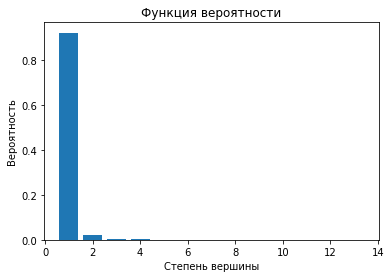

In [40]:
#sns.histplot(data=list(distribution.values()),bins=30)
plt.bar(distribution.keys(), distribution.values())
  
# naming the x axis
plt.xlabel('Степень вершины')
# naming the y axis
plt.ylabel('Вероятность')
# giving a title to my graph
plt.title('Функция вероятности')
  
# function to show the plot
plt.show()

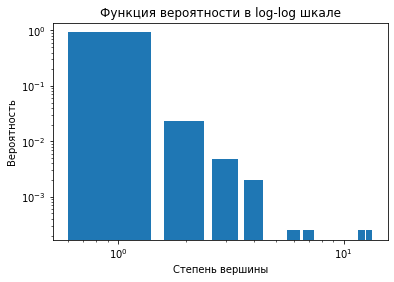

In [41]:
#sns.histplot(distribution,log_scale=True)
plt.bar(distribution.keys(), distribution.values())
  
# naming the x axis
plt.xlabel('Степень вершины')
# naming the y axis
plt.ylabel('Вероятность')
plt.xscale('log')
plt.yscale('log')  
# giving a title to my graph
plt.title('Функция вероятности в log-log шкале')
  
# function to show the plot
plt.show()